# C3 Simulator as a backend for Qiskit Experiments

This notebook demonstrates the use of the C3 Simulator with a high-level quantum programming framework [Qiskit](https://www.qiskit.org). You must additionally install qiskit and matplotlib to run this example.

In [1]:
!pip install -q qiskit==0.25.0 matplotlib==3.3.4

In [2]:
import numpy as np
from c3.qiskit import C3Provider
from qiskit import transpile, execute, QuantumCircuit, Aer
from qiskit.tools.visualization import plot_histogram

## Define a basic Quantum circuit

In [3]:
qc = QuantumCircuit(6, 6)
qc.rx(np.pi/2, 0)
qc.rx(np.pi/2, 1)
qc.measure([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])

In [4]:
qc.draw()

┌─────────┐         ┌─┐   
q_0: ┤ RX(π/2) ├─────────┤M├───
     ├─────────┤         └╥┘┌─┐
q_1: ┤ RX(π/2) ├──────────╫─┤M├
     └───┬─┬───┘          ║ └╥┘
q_2: ────┤M├──────────────╫──╫─
         └╥┘    ┌─┐       ║  ║ 
q_3: ─────╫─────┤M├───────╫──╫─
          ║     └╥┘┌─┐    ║  ║ 
q_4: ─────╫──────╫─┤M├────╫──╫─
          ║      ║ └╥┘┌─┐ ║  ║ 
q_5: ─────╫──────╫──╫─┤M├─╫──╫─
          ║      ║  ║ └╥┘ ║  ║ 
c: 6/═════╩══════╩══╩══╩══╩══╩═
          2      3  4  5  0  1

## Get the C3 Provider and Backend

In [5]:
c3_provider = C3Provider()
c3_backend = c3_provider.get_backend("c3_qasm_perfect_simulator")

In [6]:
config = c3_backend.configuration()

print("Name: {0}".format(config.backend_name))
print("Version: {0}".format(config.backend_version))
print("Max Qubits: {0}".format(config.n_qubits))
print("OpenPulse Support: {0}".format(config.open_pulse))
print("Basis Gates: {0}".format(config.basis_gates))

Name: c3_qasm_perfect_simulator
Version: 0.1
Max Qubits: 20
OpenPulse Support: False
Basis Gates: ['cx', 'cz', 'iSwap', 'id', 'x', 'y', 'z', 'rx', 'ry', 'rz', 'rzx']


### Let's view how the Qiskit Transpiler will convert the circuit

In [7]:
trans_qc = transpile(qc, c3_backend)

In [8]:
trans_qc.draw()

┌─────────┐         ┌─┐   
q_0: ┤ RX(π/2) ├─────────┤M├───
     ├─────────┤         └╥┘┌─┐
q_1: ┤ RX(π/2) ├──────────╫─┤M├
     └───┬─┬───┘          ║ └╥┘
q_2: ────┤M├──────────────╫──╫─
         └╥┘    ┌─┐       ║  ║ 
q_3: ─────╫─────┤M├───────╫──╫─
          ║     └╥┘┌─┐    ║  ║ 
q_4: ─────╫──────╫─┤M├────╫──╫─
          ║      ║ └╥┘┌─┐ ║  ║ 
q_5: ─────╫──────╫──╫─┤M├─╫──╫─
          ║      ║  ║ └╥┘ ║  ║ 
c: 6/═════╩══════╩══╩══╩══╩══╩═
          2      3  4  5  0  1

## Run an ideal device simulation using C3

In [9]:
c3_backend.set_device_config("quickstart.hjson")
c3_backend.disable_flip_labels()
c3_job = execute(qc, c3_backend, shots=1000)
result = c3_job.result()

In [10]:
res_counts = result.get_counts(qc)
print(res_counts)

{'000000': 250, '010000': 250, '100000': 250, '110000': 250}


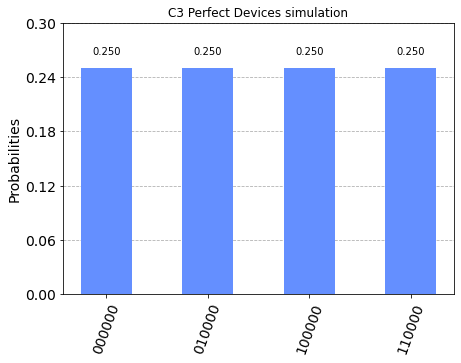

In [11]:
plot_histogram(res_counts, title='C3 Perfect Devices simulation')

## Run Simulation and verify results on Qiskit simulator

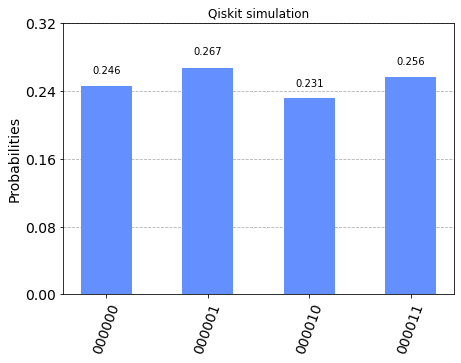

In [12]:
qiskit_simulator = Aer.get_backend('qasm_simulator')
qiskit_result = execute(qc, qiskit_simulator, shots=1000).result()
counts = qiskit_result.get_counts(qc)
plot_histogram(counts, title='Qiskit simulation')